# Standard autoregression models

In [1]:
import numpy as np
import numpy.random as rand
import seaborn as sbr
import matplotlib.pyplot as plt
import pandas as pd
from scipy import signal
import scipy.stats as stats
from statsmodels.tsa import api as tsa
from math import factorial
from pandas.tools.plotting import autocorrelation_plot
from pylab import *
import scipy.signal
from statsmodels.tsa.arima_model import ARIMA
import scipy.io
import h5py 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from spectrum import *
%matplotlib inline

C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\PRINT\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def autocorr(arr):
    res = np.correlate(arr, arr, mode = 'full')
    return res[res.size // 2:]

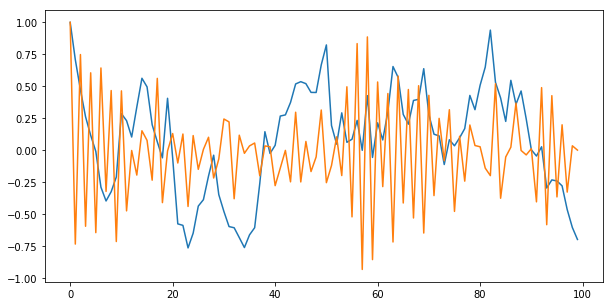

In [3]:
t = np.linspace(1, 20, num=20)

#AR
z1 = np.zeros(100)
z2 = np.zeros(100)
z1[0] = 1
z2[0] = 1
for i in range(1, 100):
    z1[i] = 0.8 * z1[i - 1] + 0.2 * np.random.randn(1)
    z2[i] = -0.8 * z2[i - 1] + 0.2 * np.random.randn(1)
    
plt.figure(figsize = (10, 5))
plt.plot(z1)
plt.plot(z2)

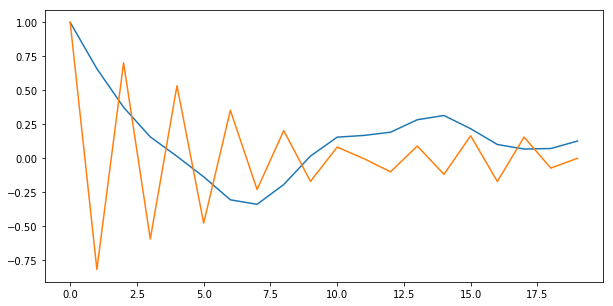

In [4]:
z1c = z1[0:20]
z2c = z2[0:20]
z1corr = autocorr(z1c)
z2corr = autocorr(z2c)
z1corr = z1corr / np.abs(z1corr.max())
z2corr = z2corr / np.abs(z2corr.max())

plt.figure(figsize = (10, 5))
plt.plot(z1corr)
plt.plot(z2corr)

C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  
C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


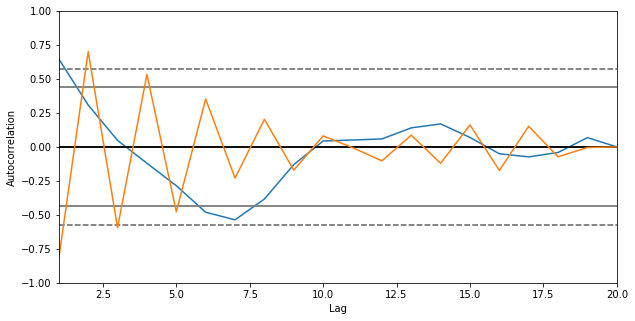

In [5]:
plt.figure(figsize = (10, 5))
autocorrelation_plot(z1c)
autocorrelation_plot(z2c)

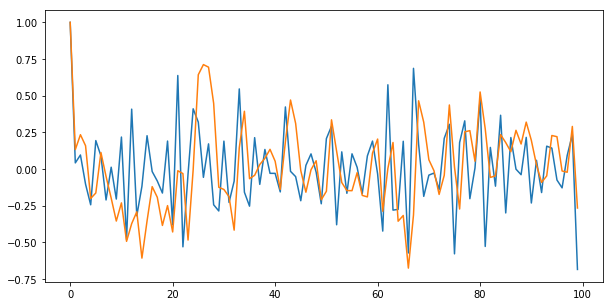

In [6]:
#MA
z3 = np.zeros(100)
z4 = np.zeros(100)
z3[0] = 1
z4[0] = 1
ar = np.random.randn(100) * 0.2
for i in range(1, 100):
    z3[i] = ar[i] - 0.8 * ar[i - 1]
    z4[i] = ar[i] + 0.8 * ar[i - 1]

plt.figure(figsize = (10, 5))
plt.plot(z3)
plt.plot(z4)

C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """
C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


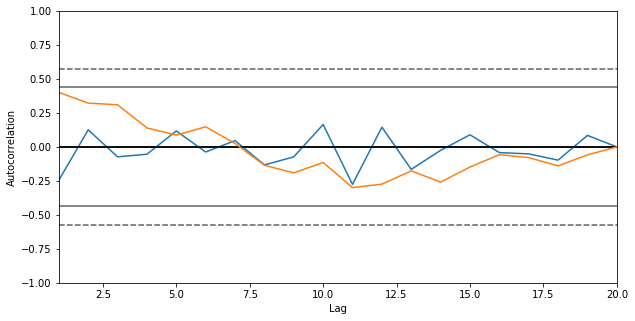

In [7]:
z3c = z3[0:20]
z4c = z4[0:20]

plt.figure(figsize = (10, 5))
autocorrelation_plot(z3c)
autocorrelation_plot(z4c)

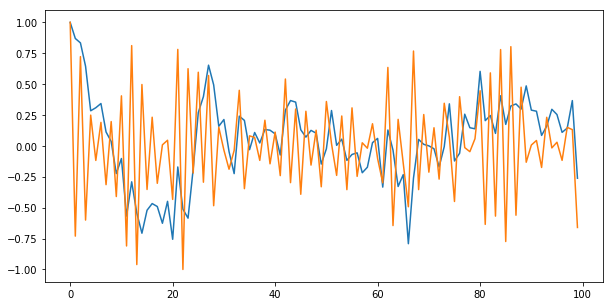

In [8]:
#ARMA
z5 = np.zeros(100)
z6 = np.zeros(100)
z5[0] = 1
z6[0] = 1
for i in range(1, 100):
    z5[i] = 0.8 * z5[i - 1] + ar[i] - 0.3 * ar[i - 1]
    z6[i] = -0.8 * z6[i - 1] + ar[i] - 0.3 * ar[i - 1]
    
plt.figure(figsize = (10, 5))
plt.plot(z5)
plt.plot(z6)

C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """
C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


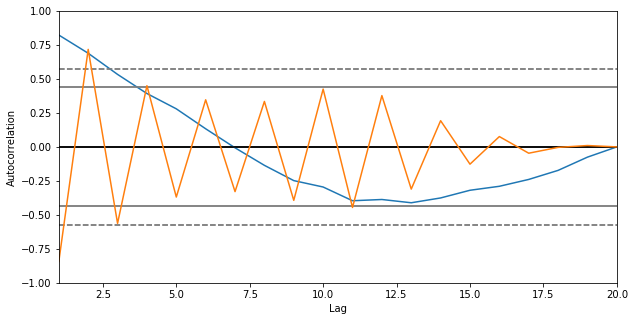

In [9]:
z5c = z5[0:20]
z6c = z6[0:20]

plt.figure(figsize = (10, 5))
autocorrelation_plot(z5c)
autocorrelation_plot(z6c)

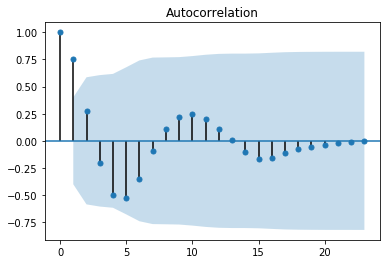

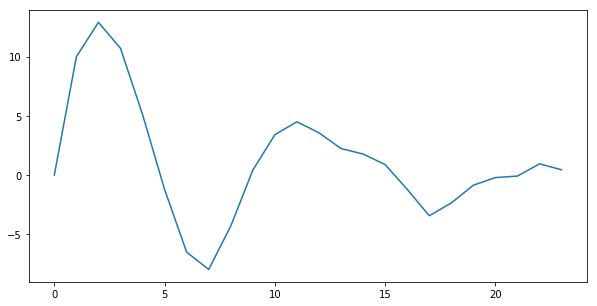

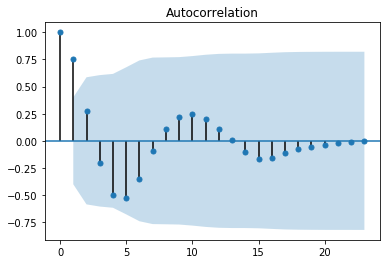

In [13]:
A = [0, 9.99, 12.89, 10.7, 5.12, -1.21, -6.5, -7.96, -4.3, 0.42, 3.41, 4.5, 3.57, 2.24, 1.78, 0.89, -1.2, -3.43, -2.35, -0.85, -0.21, -0.08, 0.95, 0.45]

plt.figure(figsize = (10, 5))
plt.plot(A)
plot_acf(A)

In [11]:
a1, var1, coeff1 = aryule(A, 1)
a2, var2, coeff2 = aryule(A, 2)
a3, var3, coeff3 = aryule(A, 3)

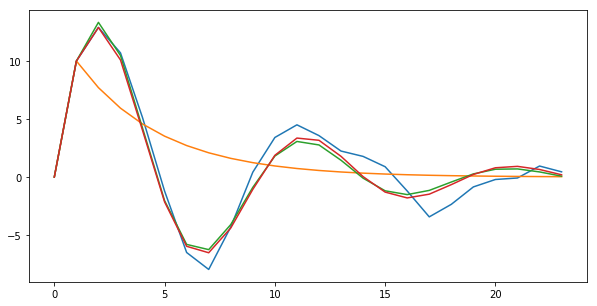

In [12]:
#AR Yul-Walker Equations
a1 = [1, -0.7704]
a2 = [1, -1.3342, 0.7318]
a3 = [1, -1.2963, 0.6626, 0.0519]
z7 = np.zeros(24)
z8 = np.zeros(24)
z9 = np.zeros(24)
z7[0] = 0 
z7[1] = 10
z8[0] = A[0]
z8[1] = A[1]
z9[0] = A[0]
z9[1] = A[1]
z9[2] = A[2]
for i in range(2, 24):
    z7[i] = -a1[1] * z7[i - 1]
    z8[i] = -a2[1] * z8[i - 1] - a2[2] * z8[i - 2]
for i in range(3, 24):
    z9[i] = -a3[1] * z9[i - 1] - a3[2] * z9[i - 2] - a3[3] * z9[i - 3]

plt.figure(figsize = (10, 5))
plt.plot(A)
plt.plot(z7)
plt.plot(z8)
plt.plot(z9)

In [14]:
def autocorr(arr):
    res = np.correlate(arr, arr, mode = 'full')
    return res[res.size // 2:]

In [15]:
#AR Coefficients
f1 = autocorr(A)
#f1 = (f1 - np.abs(f1.min())) / (np.abs(f1.max()) - np.abs(f1.min()))
f1 = f1 / np.abs(f1.max())
p1 = f1[1]
p2 = f1[2]
q = p1
q1 = (p1 * (1 - p2)) / (1 - p1**2)
q2 = (p2 - p1**2) / (1 - p1**2)
print('AR Coefficients: ', q, q1, q2)

AR Coefficients:  0.7704732831172564 1.334624358524514 -0.732213676669955


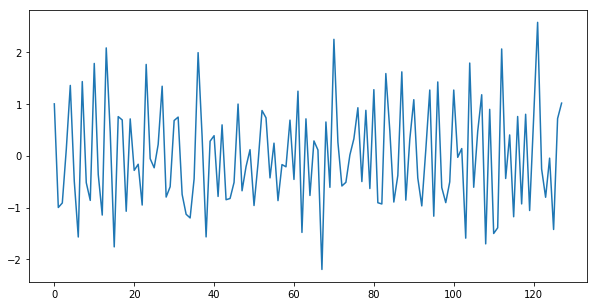

In [17]:
f = h5py.File('12.mat', 'r') 
data = f.get('z12') 
z12 = np.array(data)
z12.shape

plt.figure(figsize = (10, 5))
plt.plot(z12)

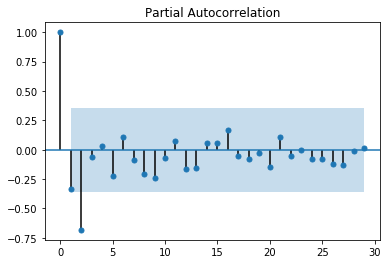

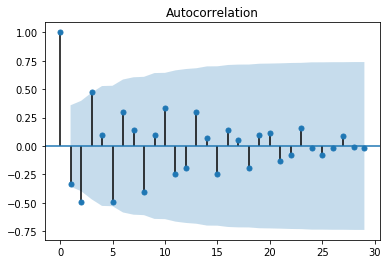

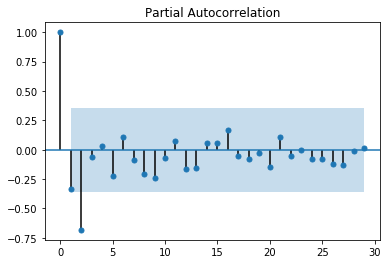

In [20]:
z12c = z12[0:30]

plt.figure(figsize = (10, 5))
plot_acf(z12c)
plot_pacf(z12c)

C:\Users\PRINT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  after removing the cwd from sys.path.


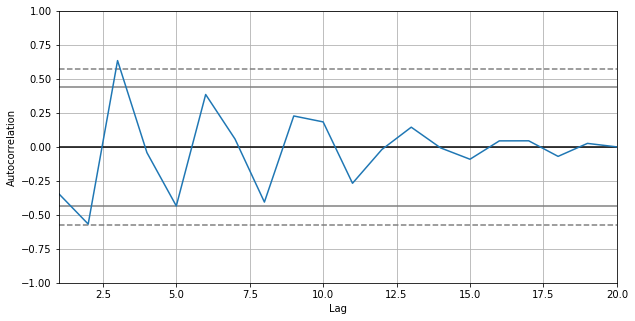

In [21]:
z12c = z12[0:20]

plt.figure(figsize = (10, 5))
autocorrelation_plot(z12c)

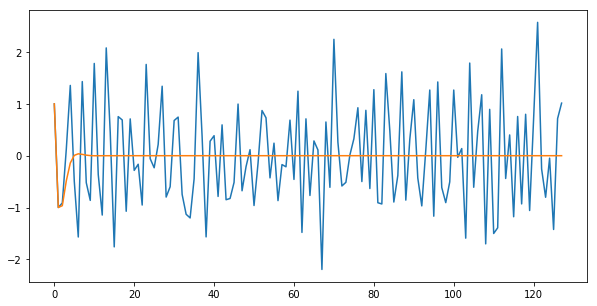

In [22]:
#aryule
atest = [-0.7388, 0.2267]
f2 = autocorr(np.ravel(z12))
f2 = f2 / np.abs(f2.max())
p11 = f2[1]
p21 = f2[2]
q11 = (p11 * (1 - p21)) / (1 - p11**2)
q21 = (p21 - p11**2) / (1 - p11**2)
z13 = np.zeros(128)
z13[0] = z12[0]
z13[1] = z12[1]
for i in range(2, 128):
    z13[i] = -atest[0] * z13[i - 1] - atest[1] * z13[i - 2]
    
plt.figure(figsize = (10, 5))
plt.plot(z12)
plt.plot(z13)

In [23]:
model = ARIMA(z12, order=(2, 0, 3))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  128
Model:                     ARMA(2, 3)   Log Likelihood                -163.257
Method:                       css-mle   S.D. of innovations              0.864
Date:                Tue, 26 Feb 2019   AIC                            340.515
Time:                        11:19:58   BIC                            360.479
Sample:                             0   HQIC                           348.626
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0022      0.034     -0.066      0.947      -0.068       0.064
ar.L1.y        0.6114      0.435      1.407      0.162      -0.240       1.463
ar.L2.y        0.1431      0.344      0.416      0.6

C:\Users\PRINT\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


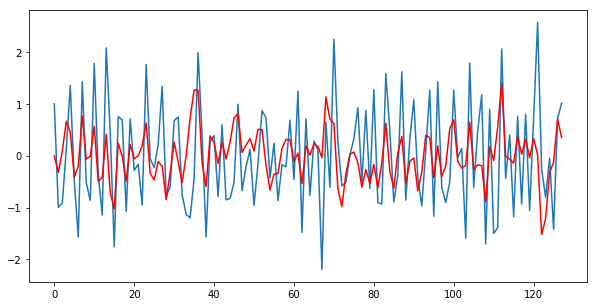

In [24]:
plt.figure(figsize = (10, 5))
plt.plot(z12)
plt.plot(model_fit.fittedvalues, color='red')